In [1]:
#Description:
#Chart Pattern Image Recognition - Identify chart patterns by Convolutional Neural Networks 
#Model Type: Convolutional Neural Network
#06-10-2022
#Version - V1.0 Beta


#------------------------------
#Version Updates:
#Import DATADIR
#Resize the Images
#Create the training dataset
#Shuffle the data so the AI learns correclty 
#Pack into the variables right before we feed it to our neural network 
#Save the data so we dont have to be importing all the time 

#------------------------------
#Future implementations 
#Add more data to the dataset
#Add Automated Download dataset from google images 
#Add more CATEGORIES such as Flags, Pennant, Cup and handle and so on. 
#Add Auto Test Image from any Chart  

### Author - Luiz Gabriel Bongiolo

### References 
# Harrison Kinsley @Sentdex - Deep Learning with Python, TensorFlow, and Keras tutorial - https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/
# Shaan Shah - Identifying Candlestick Patterns using Deep Learning - https://towardsdatascience.com/identifying-candlestick-patterns-using-deep-learning-b7d706726874
# https://www.tensorflow.org/api_docs/python/tf/all_symbols
# https://keras.io/api/layers/

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import cv2 
import random 

# Remove warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
DATADIR = "/home/user/Documents/Chart Pattern Image Recognition/Chartpatterns"
CATEGORIES = ["Bearish", "Bullish"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #Remember to change grayscale if you need this
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break 



FileNotFoundError: [Errno 2] No such file or directory: '/home/user/Documents/Chart Pattern Image Recognition/Chartpatterns/Bearish'

In [ ]:
print(img_array)
print(img_array.shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(938, 1698)


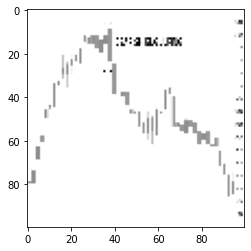

In [ ]:
#Resizing the images 

IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()


In [ ]:
#Create the training dataset

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)                                   #path to cats or dogs dir
        class_num = CATEGORIES.index(category)                                   # Classification of the dogs and cat to 0 and 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #Remember to change grayscale if you need this
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


create_training_data()



In [ ]:
print(len(training_data)) #We should balance the dataset, it is good to have 50% each or 50 50 


16


In [ ]:
#Shuffle the data so the AI learns correclty 

random.shuffle(training_data)

In [ ]:
#Check labels 

for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
0
0
1
0
0
0


In [ ]:
#Pack into the variables right before we feed it to our neural network 

X = []
y = []


In [ ]:
for features, label in training_data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)    #needs to be an array / -1 is for gray scale / we need to change 1 to 3, because we would have 3 values on the color scale 



In [ ]:
#Save the data so we dont have to be importing all the time 

import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [ ]:
pickle_in = open("X.pickle", "rb")

X = pickle.load(pickle_in)



In [ ]:
#X[1]
#y[3]